# Некоторые данные из ДТП со смертельным исходом #
Период: 1990 - 2019 год

In [3]:
# импортируем библиотеку pandas
import pandas as pand

In [4]:
# и библиотеки для визуализации
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# загружаем файл RoadRash.csv с библиотекой pandas
rr = pand.read_csv('RoadRash.csv')

In [3]:
# смотрим, что же там есть в этой статистике?
rr.info()
# тут мы видим что в некоторых данных есть нулевые значения (Code: 6150 не нулевых из 8010 возможных и т.д.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 8010 non-null   object 
 1   Code                   6150 non-null   object 
 2   Year                   8010 non-null   int64  
 3   Deaths                 8010 non-null   int64  
 4   Sidedness              8010 non-null   int64  
 5   Historical_Population  6300 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 375.6+ KB


## В статистике приведены следующие данные ##


*Entity* - страна

*Code* - код страны

*Year* - год, за который собрана статистика

*Deaths* - общее кол-во смертей, в рез-те дорожно-транспортных происшествий

*Sidedness* - правостороннее движение (0) или левостороннее (1)

*Historical_Population* - численность населения

In [19]:
# тут реализован простой поиск по странам
def find():
    search = input('Введите страну для поиска: ')
    if (rr['Entity'].str.contains(search)).any() == True:
        return rr[rr['Entity'].str.contains(search)]
    else: print('Совпадений не найдено')
find()

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
5820,Russia,RUS,1990,39298,0,147531562.0
5821,Russia,RUS,1991,39515,0,147995584.0
5822,Russia,RUS,1992,41484,0,148268576.0
5823,Russia,RUS,1993,47191,0,148373584.0
5824,Russia,RUS,1994,49102,0,148349443.0
5825,Russia,RUS,1995,44806,0,148227471.0
5826,Russia,RUS,1996,39482,0,148020852.0
5827,Russia,RUS,1997,35532,0,147730020.0
5828,Russia,RUS,1998,35166,0,147360613.0
5829,Russia,RUS,1999,38627,0,146915915.0


*Попробуем реализовать это в графическом исполнении*

<AxesSubplot: xlabel='Year', ylabel='Deaths'>

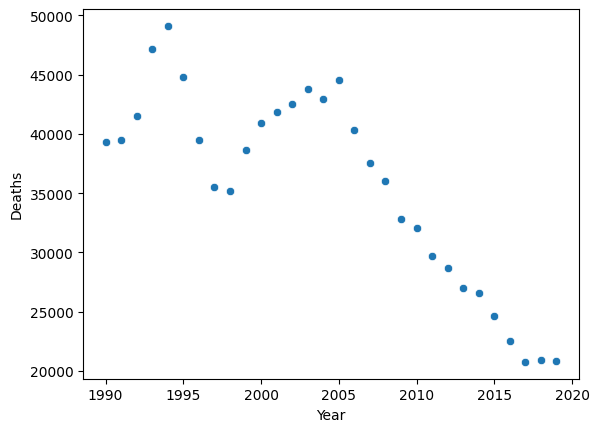

In [7]:
# Тут у нас Россия с 1990 по 2019 год
sns.scatterplot(data=rr[rr['Entity'] == 'Russia'], x="Year", y="Deaths")

<AxesSubplot: xlabel='Year', ylabel='Deaths'>

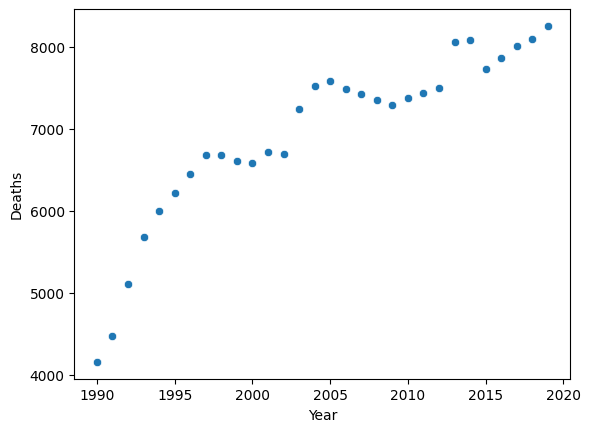

In [9]:
# А тут Афганистан...
# ... и судя по графику они не работали над безопасностью дорожного движения)
sns.scatterplot(data=rr[rr['Entity'] == 'Afghanistan'], x="Year", y="Deaths")

<AxesSubplot: xlabel='Year', ylabel='Deaths'>

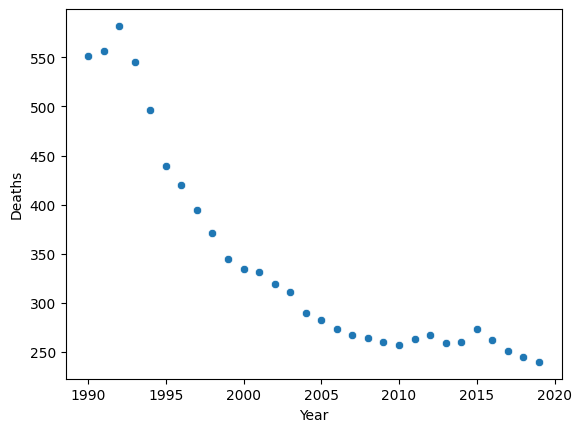

In [12]:
# Тут пробуем вывести график по поиску, но нужно точно указывать страну, 
# иначе будет включать несколько стран и произойдет накладка графиков
# Armenia точно работает)

sns.scatterplot(data=find(), x="Year", y="Deaths")

In [10]:
(rr['Entity'].str.contains('Rus')).any()

True

In [24]:
# Создадим отдельный фрейм для Афганистана и добавим туда колонку с процентным отношением к населению в целом 
# и убедимся что прирост населения дал прирост смертельных аварий, при этом процент падает со временем)
rrtemp = rr[rr['Entity'] == 'Afghanistan']
rrtemp = rrtemp.assign(Percent = rrtemp.Deaths*100/rrtemp.Historical_Population)
rrtemp


,Entity,Code,Year,Deaths,Sidedness,Historical_Population,Percent
0,Afghanistan,AFG,1990,4154,0,12412311.0,0.033467
1,Afghanistan,AFG,1991,4472,0,13299016.0,0.033627
2,Afghanistan,AFG,1992,5106,0,14485543.0,0.035249
3,Afghanistan,AFG,1993,5681,0,15816601.0,0.035918
4,Afghanistan,AFG,1994,6001,0,17075728.0,0.035143
5,Afghanistan,AFG,1995,6211,0,18110662.0,0.034295
6,Afghanistan,AFG,1996,6447,0,18853444.0,0.034195
7,Afghanistan,AFG,1997,6677,0,19357126.0,0.034494
8,Afghanistan,AFG,1998,6683,0,19737770.0,0.033859
9,Afghanistan,AFG,1999,6603,0,20170847.0,0.032735


In [25]:
# Сделаем то же самое с Россией...
rrtemp = rr[rr['Entity'] == 'Russia']
rrtemp = rrtemp.assign(Percent = rrtemp.Deaths*100/rrtemp.Historical_Population)
rrtemp

,Entity,Code,Year,Deaths,Sidedness,Historical_Population,Percent
5820,Russia,RUS,1990,39298,0,147531562.0,0.026637
5821,Russia,RUS,1991,39515,0,147995584.0,0.026700
5822,Russia,RUS,1992,41484,0,148268576.0,0.027979
5823,Russia,RUS,1993,47191,0,148373584.0,0.031806
5824,Russia,RUS,1994,49102,0,148349443.0,0.033099
5825,Russia,RUS,1995,44806,0,148227471.0,0.030228
5826,Russia,RUS,1996,39482,0,148020852.0,0.026673
5827,Russia,RUS,1997,35532,0,147730020.0,0.024052
5828,Russia,RUS,1998,35166,0,147360613.0,0.023864
5829,Russia,RUS,1999,38627,0,146915915.0,0.026292
